In [51]:
import polars as pl 
import matplotlib as plt 
import scienceplots
import warnings


warnings.filterwarnings('ignore', module='matplotlib')
plt.style.use('ieee')

In [52]:
data = pl.read_parquet("/home/alqua/papers/mbs_flexibility_mpc_rev_v1/mpc/output_data/lmpc_rain_shift_results.par")

In [53]:
data = data[400:]

In [54]:
data.columns

['time_utc',
 'u1',
 'u2',
 'u3',
 'p1_power',
 'p3_power',
 'p4_power',
 'qout',
 'qin',
 'height_sys',
 'height_ref',
 'pressure_sys',
 'opt_time_lmpc']

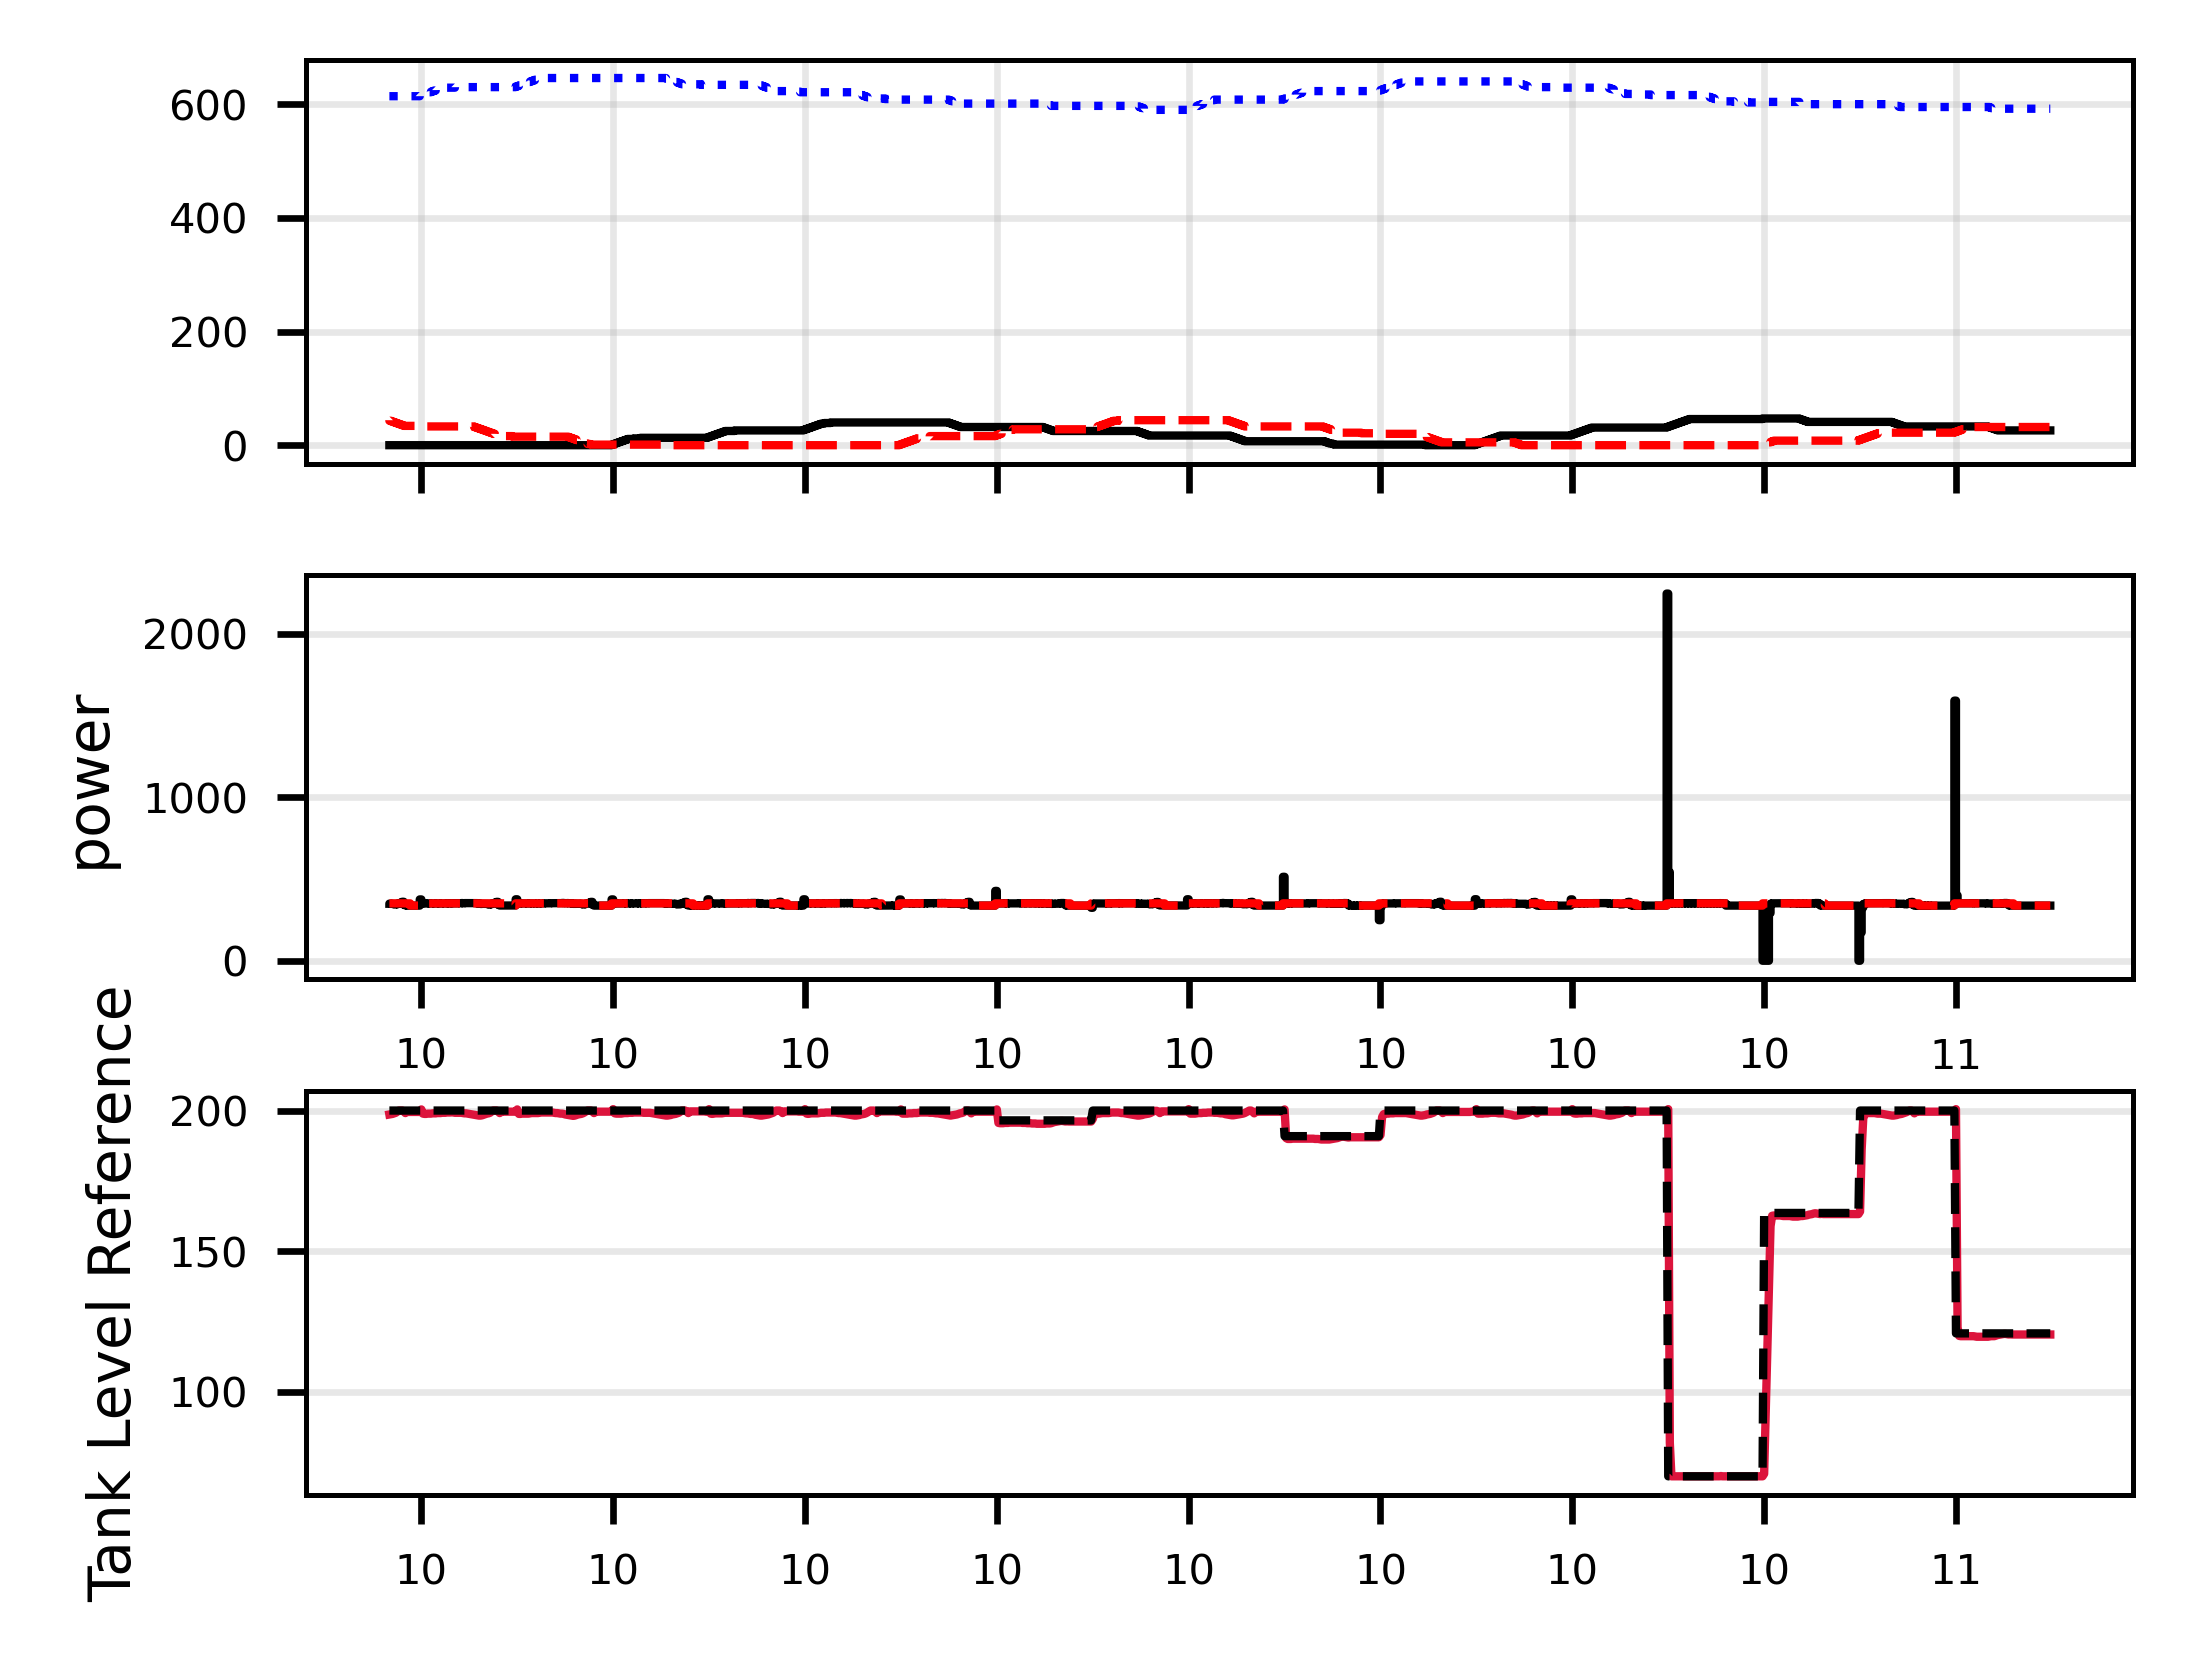

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import warnings

warnings.filterwarnings('ignore', module='matplotlib')

#===============================#
#         GLOBAL STYLE          #
#===============================#
FONT_SIZE_LABEL    = 7
FONT_SIZE_TITLE    = 7
FONT_SIZE_TICKS    = 5
FONT_SIZE_LEGEND   = 6
AXIS_LABEL_WEIGHT  = 'normal'
LINEWIDTH          = 0.7
LABELPAD           = 3
MARKERSIZE         = 2

plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': 'DejaVu Sans',  # Use 'Helvetica' if installed
    'font.size': 16,
    'pdf.fonttype': 42,
    'axes.labelsize': FONT_SIZE_LABEL,
    'axes.labelweight': AXIS_LABEL_WEIGHT,
    'axes.titlesize': FONT_SIZE_TITLE,
    'xtick.labelsize': FONT_SIZE_TICKS,
    'ytick.labelsize': FONT_SIZE_TICKS,
    'legend.fontsize': FONT_SIZE_LEGEND,
    'lines.linewidth': 1,
    'lines.markersize': MARKERSIZE,
})

#=========================#
#      PLOTTING LAYOUT    #
#=========================#
fig, axs = plt.subplots(
    3, 1,
    figsize=(3.5, 2.6),
    gridspec_kw=dict(height_ratios=[1, 1, 1]),
    sharex=True,   # <-- share the time axis
    # sharey=True, # <-- Uncomment if you want all left y-axes to be identical scales
)

#----- Top panel -----#
ax1 = axs[0]
ax1.step(data['time_utc'], data['u1'])
ax1.step(data['time_utc'], data['u2'])
ax1.step(data['time_utc'], data['u3'])
ax1.grid(True, zorder=0, alpha=0.3)
ax1.xaxis.set_major_formatter(DateFormatter('%d'))
plt.setp(ax1.xaxis.get_majorticklabels(), visible=True)

#----- Second panel (middle) -----#
ax2= axs[1]
ax2.step(data['time_utc'], data["qout"])
ax2.step(data['time_utc'], data["qin"])
ax2.set_ylabel('power', labelpad=LABELPAD, fontweight=AXIS_LABEL_WEIGHT)
ax2.grid(axis='y', alpha=0.3)
ax2.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)

#----- Third panel (bottom) -----#
ax3 = axs[2]
ax3.set_ylabel('Tank Level Reference', labelpad=LABELPAD, fontweight=AXIS_LABEL_WEIGHT)
ax3.plot(data["time_utc"], data["height_sys"], color="crimson")
ax3.plot(data["time_utc"], data["height_ref"], color="k")
ax3.grid(axis='y', alpha=0.3)
ax3.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)

#----- Style spines -----#
for ax in [ax1, ax2, ax3, ax1b, ax2b, ax3b]:
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_linewidth(0.6)

plt.tight_layout(pad=0.1)
plt.show()